In [1]:
import pandas as pd

In [2]:
#Leitura dos arquivos
df1= pd.read_excel('Aracaju.xlsx')
df2= pd.read_excel('Fortaleza.xlsx')
df3= pd.read_excel('Natal.xlsx')
df4= pd.read_excel('Recife.xlsx')
df5= pd.read_excel('Salvador.xlsx')

In [3]:
# Juntando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
#Alterando o tipo de lojaiID
df['LojaID']= df['LojaID'].astype('object')

## Tratando linhas com dados faltantes

In [5]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

# Criando novas colunas

In [6]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [7]:
#achado a maior receita

df.Receita.max()
#'df['Receita'].max()

3544.0

In [8]:
#achando as lojas com maior receita
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [9]:
#achando as lojas com menor receita
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [10]:
#agrupamento por cidade
df.groupby('Cidade')['Receita'].sum().sort_values(ascending=False)

Cidade
Natal        167227.52
Recife        51936.51
Aracaju       48748.25
Salvador      40596.73
Fortaleza     37913.97
Name: Receita, dtype: float64

# Trabalhando com datas

In [11]:
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [12]:
# trasnformando a coluna data em data
df['Data']= pd.to_datetime(df['Data'])
#df['Data'] = df['Data'].astype('datetime64[ns]')

df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [13]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [14]:
# Criando uma nova coluna com o ano
df['ano_venda']=df.Data.dt.year
#ou tbm
#df['ano_venda']=df.['Data'].dt.year

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda
34,Salvador,2019-01-01,36.54,1037,3,109.62,2019
184,Natal,2019-01-02,167.16,1037,1,167.16,2019
33,Aracaju,2018-01-01,35.09,1523,4,140.36,2018
60,Aracaju,2018-01-01,215.88,1521,3,647.64,2018
194,Salvador,2019-01-02,156.47,1035,1,156.47,2019


In [15]:
# Extraindo mes e dia
df['mes_venda'], df['dia_venda'] = (df.Data.dt.month, df.Data.dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda
64,Recife,2019-01-01,89.32,983,2,178.64,2019,1,1
20,Salvador,2019-01-01,33.97,1034,3,101.91,2019,1,1
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,2019,1,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2
77,Natal,2019-04-01,426.00,853,3,1278.00,2019,4,1


In [16]:
# Mostrando a venda mais antiga
df.Data.min()

Timestamp('2018-01-01 00:00:00')

In [17]:
# Calculando a diferencaq de dias
df['diferenca_dias'] = df.Data - df.Data.min()
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,2019,1,1,365 days
99,Natal,2019-01-02,40.38,1037,1,40.38,2019,1,2,366 days
229,Salvador,2019-01-02,43.08,1036,2,86.16,2019,1,2,366 days
37,Salvador,2019-01-01,18.31,1036,3,54.93,2019,1,1,365 days
123,Aracaju,2018-01-01,115.19,1523,6,691.14,2018,1,1,0 days
82,Salvador,2019-01-01,207.88,1035,1,207.88,2019,1,1,365 days
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days
210,Salvador,2019-01-02,197.64,1035,1,197.64,2019,1,2,366 days
19,Aracaju,2018-01-01,43.96,1520,9,395.64,2018,1,1,0 days


In [18]:
#Criando coluna trimestre
df['trimestre_venda']= df.Data.dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
49,Fortaleza,2019-01-01,183.33,1002,6,1099.98,2019,1,1,365 days,1
5,Salvador,2019-01-01,179.20,1037,3,537.60,2019,1,1,365 days,1
85,Salvador,2019-01-01,16.88,1035,3,50.64,2019,1,1,365 days,1
81,Salvador,2019-01-01,17.36,1037,2,34.72,2019,1,1,365 days,1
143,Natal,2019-01-02,41.18,1037,2,82.36,2019,1,2,366 days,1


In [19]:
df.groupby(df.trimestre_venda)['Receita'].sum()

trimestre_venda
1    293494.98
2     29648.00
3     11658.00
4     11622.00
Name: Receita, dtype: float64

In [20]:
#Filtrar as vendas de 2019  e mes e março
filtro1= df.Data.dt.year == 2019 
filtro2= df.Data.dt.month == 3
vendas_marco2019= df.loc[filtro1 & filtro2]
vendas_marco2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,2019,3,7,430 days,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,2019,3,2,425 days,1


# Visualização de dados

In [21]:
#mostrando  a quantidade de vendas por lojas
df.LojaID.value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

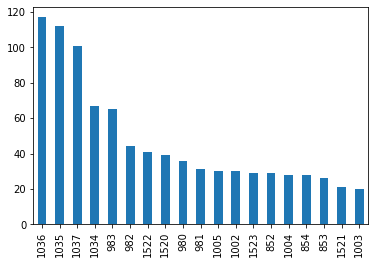

In [22]:
#Grafico de barras
df.LojaID.value_counts(ascending=False).plot.bar()

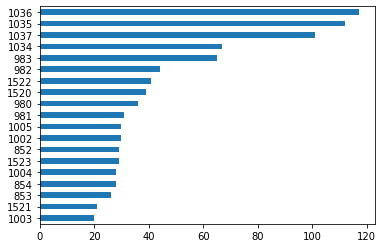

In [23]:
#Grafico de barras horizontais
df.LojaID.value_counts(ascending=True).plot.barh();

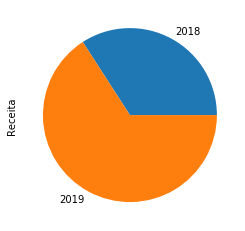

In [24]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [25]:
#total de vendas por cidade
df.Cidade.value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

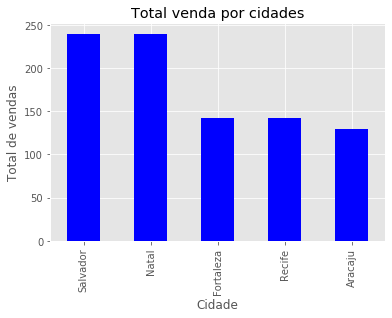

In [32]:
#Adicionanto titulos
import matplotlib.pyplot as plt
df.Cidade.value_counts().plot.bar(title='Total venda por cidades', color='blue')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');

In [30]:
#Alterando o estilo
plt.style.use('ggplot')

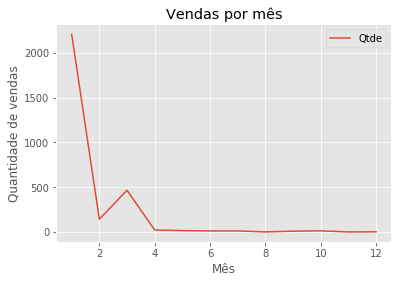

In [34]:
df.groupby(df.mes_venda)['Qtde'].sum().plot(title='Vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.legend();

In [38]:
#Selecionando apenas 2019
filtro_2019 = df.Data.dt.year == 2019
vendas_2019= df.loc[filtro_2019]

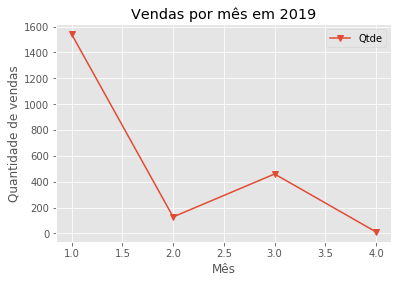

In [40]:
vendas_2019.groupby(vendas_2019.mes_venda)['Qtde'].sum().plot(title='Vendas por mês em 2019', marker='v')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.legend();

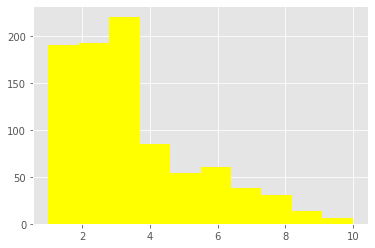

In [43]:
# Histograma
plt.hist(df.Qtde, color='yellow');

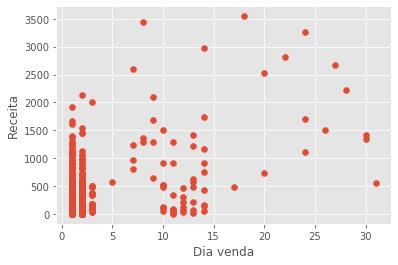

In [47]:
# Grafico de dispersão
plt.scatter(x=vendas_2019.dia_venda, y=vendas_2019.Receita)
plt.xlabel('Dia venda')
plt.ylabel('Receita');

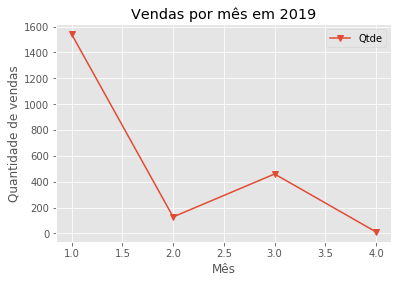

In [48]:
# Salvando como png
vendas_2019.groupby(vendas_2019.mes_venda)['Qtde'].sum().plot(title='Vendas por mês em 2019', marker='v')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.legend()
plt.savefig('grafico qtd x mes.png')
